# Imports 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## *E*xploratory *D*ata *A*nalysis

In [ ]:
df = pd.read_csv('/content/Heart_Strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
df.shape

(43400, 12)

In [ ]:
X = df.drop(['id', 'stroke'], axis = 1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN


In [ ]:
y = df['stroke']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

### Encoding 

In [ ]:
label_encode_needed = ['gender', 'ever_married', 'Residence_type'] 
encoder = LabelEncoder()
for col in label_encode_needed:
    X[col] = encoder.fit_transform(X[col])
    print(list(encoder.classes_))

['Female', 'Male', 'Other']
['No', 'Yes']
['Rural', 'Urban']


In [ ]:
dummies = pd.get_dummies(X['work_type'])

In [ ]:
dummies.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
X = pd.concat([X, dummies], axis=1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,Self-employed,children
0,1,3.0,0,0,0,children,0,95.12,18.0,NaN,0,0,0,0,1
1,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0,1,0,0
2,0,8.0,0,0,0,Private,1,110.89,17.6,NaN,0,0,1,0,0
3,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0,1,0,0
4,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0,1,0,0,0


In [ ]:
X.drop(['work_type'], inplace=True, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Checking and Removing Missing Values

In [ ]:
X_train.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
Residence_type           0
avg_glucose_level        0
bmi                   1157
smoking_status       10579
Govt_job                 0
Never_worked             0
Private                  0
Self-employed            0
children                 0
dtype: int64

In [ ]:
X_train['bmi'].describe()

count    33563.000000
mean        28.620692
std          7.797119
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

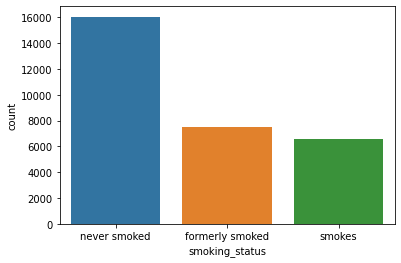

In [ ]:
sns.countplot(x='smoking_status', data=df)
plt.show()

In [ ]:
bmi_median = X_train['bmi'].median()
bmi_median

27.7

In [ ]:
smoking_status_mode = X_train['smoking_status'].mode()
smoking_status_mode

0    never smoked
dtype: object

In [ ]:
X_train.fillna(value = {"bmi":bmi_median, 'smoking_status':'never smoked'}, inplace=True)

In [ ]:
X_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
dtype: int64

In [ ]:
X_test.fillna(value = {"bmi":bmi_median, 'smoking_status':'never smoked'}, inplace=True)

In [ ]:
X_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
dtype: int64

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,Self-employed,children
12858,0,73.0,0,0,1,0,143.98,28.6,never smoked,0,0,1,0,0
10591,0,26.0,0,0,1,0,103.77,23.3,formerly smoked,0,0,1,0,0
26775,0,19.0,0,0,0,1,83.54,22.8,never smoked,0,0,1,0,0
6662,0,34.0,0,0,1,1,63.99,25.1,never smoked,0,0,1,0,0
19985,1,42.0,0,0,1,1,81.89,42.8,smokes,0,0,1,0,0


smoking_status Encoding 

In [ ]:
X_train['smoking_status'] = X_train['smoking_status'].map({'smokes':2,'formerly smoked':1, 'never smoked':0}) 
X_test['smoking_status'] = X_test['smoking_status'].map({'smokes':2,'formerly smoked':1, 'never smoked':0}) 

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,Self-employed,children
12858,0,73.0,0,0,1,0,143.98,28.6,0,0,0,1,0,0
10591,0,26.0,0,0,1,0,103.77,23.3,1,0,0,1,0,0
26775,0,19.0,0,0,0,1,83.54,22.8,0,0,0,1,0,0
6662,0,34.0,0,0,1,1,63.99,25.1,0,0,0,1,0,0
19985,1,42.0,0,0,1,1,81.89,42.8,2,0,0,1,0,0


In [ ]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,Self-employed,children
29554,0,54.0,0,0,1,0,57.35,29.8,0,0,0,1,0,0
10797,0,19.0,0,0,0,0,73.94,34.6,0,0,0,1,0,0
23773,0,27.0,0,0,0,1,99.21,30.2,0,0,0,1,0,0
26068,0,55.0,0,0,1,1,182.41,39.4,2,1,0,0,0,0
28893,0,68.0,0,0,1,0,193.16,38.7,0,0,0,1,0,0


## Feature Scaling

In [ ]:
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,Self-employed,children
0,-0.833310,1.368223,-0.317968,-0.223725,0.745964,-1.001037,0.919334,0.001303,-0.640771,-0.379903,-0.064759,0.864193,-0.428261,-0.407239
1,-0.833310,-0.715846,-0.317968,-0.223725,0.745964,-1.001037,-0.013846,-0.689902,0.703656,-0.379903,-0.064759,0.864193,-0.428261,-0.407239
2,-0.833310,-1.026239,-0.317968,-0.223725,-1.340547,0.998964,-0.483338,-0.755110,-0.640771,-0.379903,-0.064759,0.864193,-0.428261,-0.407239
3,-0.833310,-0.361111,-0.317968,-0.223725,0.745964,0.998964,-0.937047,-0.455153,-0.640771,-0.379903,-0.064759,0.864193,-0.428261,-0.407239
4,1.197184,-0.006376,-0.317968,-0.223725,0.745964,0.998964,-0.521630,1.853210,2.048083,-0.379903,-0.064759,0.864193,-0.428261,-0.407239


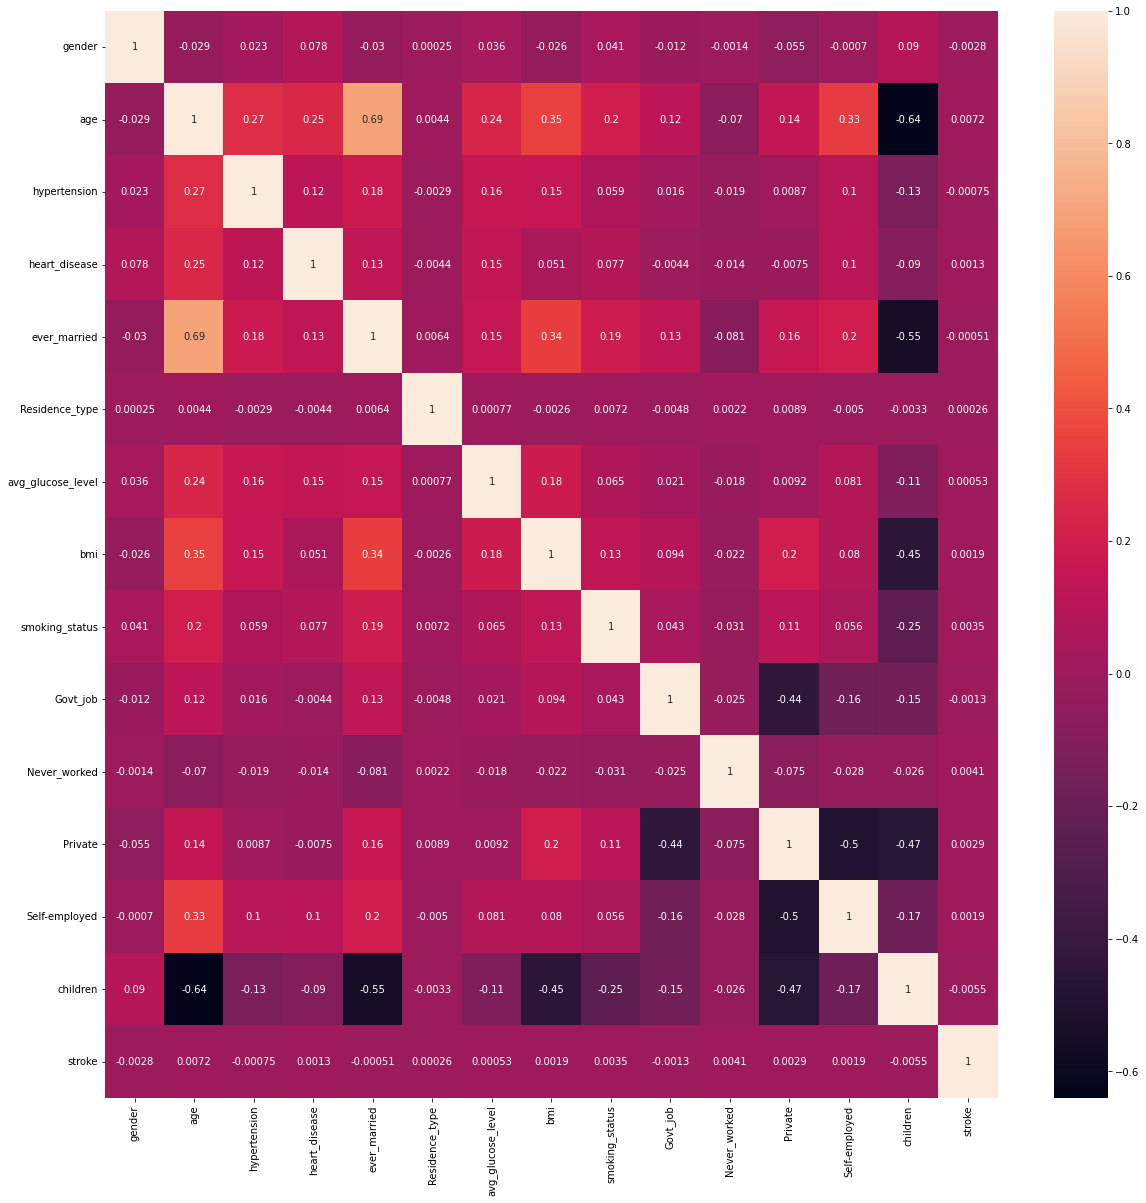

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True)

## Models

#### Support Vector Machine 

In [ ]:
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train, y_train)
print("Training accuracy of the model is {:.2f}".format(svc.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(X_test, y_test)))
pred = svc.predict(X_test)
conf_mat=confusion_matrix(y_test, pred)
print(conf_mat)

Training accuracy of the model is 0.98
Testing accuracy of the model is 0.98
[[8519    0]
 [ 161    0]]


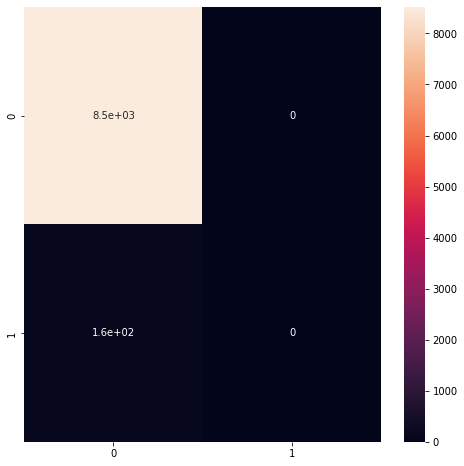

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("Training accuracy of the model is {:.2f}".format(lr.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(lr.score(X_test, y_test)))
pred = lr.predict(X_test)
conf_mat=confusion_matrix(y_test, pred)
print(conf_mat)

Training accuracy of the model is 0.98
Testing accuracy of the model is 0.98
[[8519    0]
 [ 161    0]]


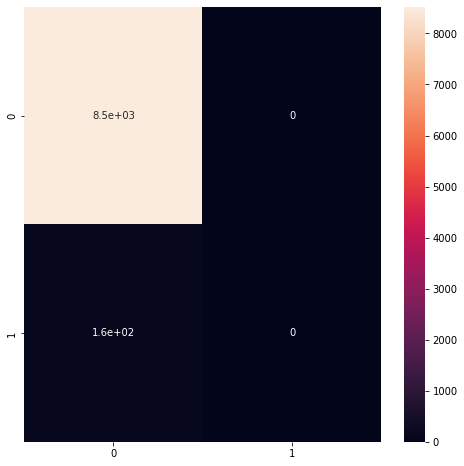

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Training accuracy of the model is {:.2f}".format(dt.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(dt.score(X_test, y_test)))
pred = dt.predict(X_test)
conf_mat=confusion_matrix(y_test, pred)
print(conf_mat)

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.96
[[8320  199]
 [ 152    9]]


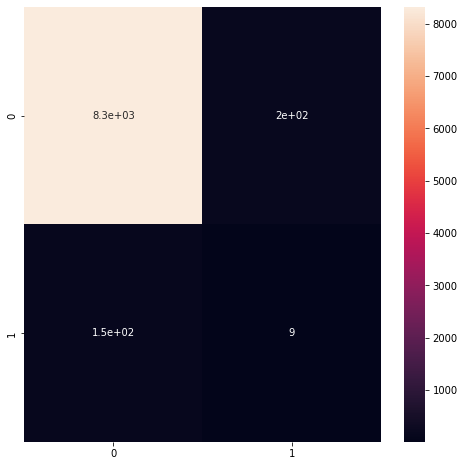

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True)

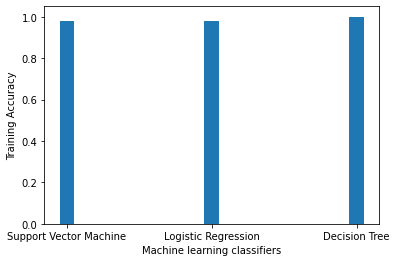

In [4]:
x1 = ["Support Vector Machine", "Logistic Regression", "Decision Tree"]
train_acc_svc=0.98
train_acc_lr=0.98
train_acc_dt=1.00
y1 = [train_acc_svc,train_acc_lr,train_acc_dt]

plt.bar(x1,y1, width = 0.1)
plt.xlabel("Machine learning classifiers")
plt.ylabel("Training Accuracy")
plt.show()

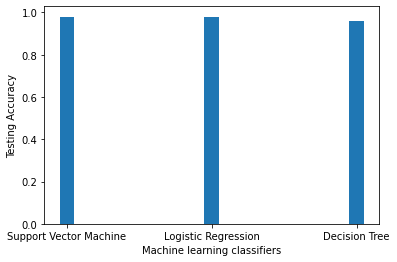

In [5]:
x2 = ["Support Vector Machine", "Logistic Regression", "Decision Tree"]
test_acc_svc=0.98
test_acc_lr=0.98
test_acc_dt=0.96
y2 = [test_acc_svc,test_acc_lr,test_acc_dt]

plt.bar(x2,y2, width = 0.1)
plt.xlabel("Machine learning classifiers")
plt.ylabel("Testing Accuracy")
plt.show()